Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Defining value of accuracy, f1 score and recall obtained on various tested model

In [2]:
cnn_metrics = ['Accuracy', 'F1 Score', 'Recall']
cnn_lengths = ['3s', '5s', '10s']

cnn_data = {
    'Model': ['CNN'] * 9,
    'Dataset_Length': [l for l in cnn_lengths for _ in range(3)],
    'Metric': cnn_metrics * 3,
    'Value': (
        # 3s: Acc, F1, Rec
        [0.70, 0.70, 0.70] +
        # 5s: Acc, F1, Rec
        [0.73, 0.70, 0.70] +
        # 10s: Acc, F1, Rec
        [0.76, 0.76, 0.76]
    )
}

resnet_data = {
    'Model': ['ResNet18'] * 9,
    'Dataset_Length': [l for l in cnn_lengths for _ in range(3)],
    'Metric': cnn_metrics * 3,
    'Value': (
        # 3s: Acc, F1, Rec
        [0.798, 0.79, 0.80] +
        # 5s: Acc, F1, Rec
        [0.806, 0.80, 0.80] +
        # 10s: Acc, F1, Rec
        [0.72, 0.72, 0.72]
    )
}

#Late Fusion data ONLY 5s
fusion_data_dict = {
    'Model': ['Late Fusion'] * 3,
    'Dataset_Length': ['5s'] * 3,
    'Metric': cnn_metrics,
    'Value': [
        # 5s: Acc, F1, Rec
        0.804, 0.8, 0.8
    ]
}

Combine all data into a single DataFrame

In [3]:
df_cnn = pd.DataFrame(cnn_data)
df_resnet = pd.DataFrame(resnet_data)
df_fusion = pd.DataFrame(fusion_data_dict)

df_risultati = pd.concat([df_cnn, df_resnet, df_fusion])

df_risultati['Dataset_Length'] = pd.Categorical(
    df_risultati['Dataset_Length'],
    categories=['3s', '5s', '10s'],
    ordered=True
)
df_risultati['Model'] = pd.Categorical(
    df_risultati['Model'],
    categories=['CNN', 'ResNet18', 'Late Fusion'],
    ordered=True
)

Genrating the plot

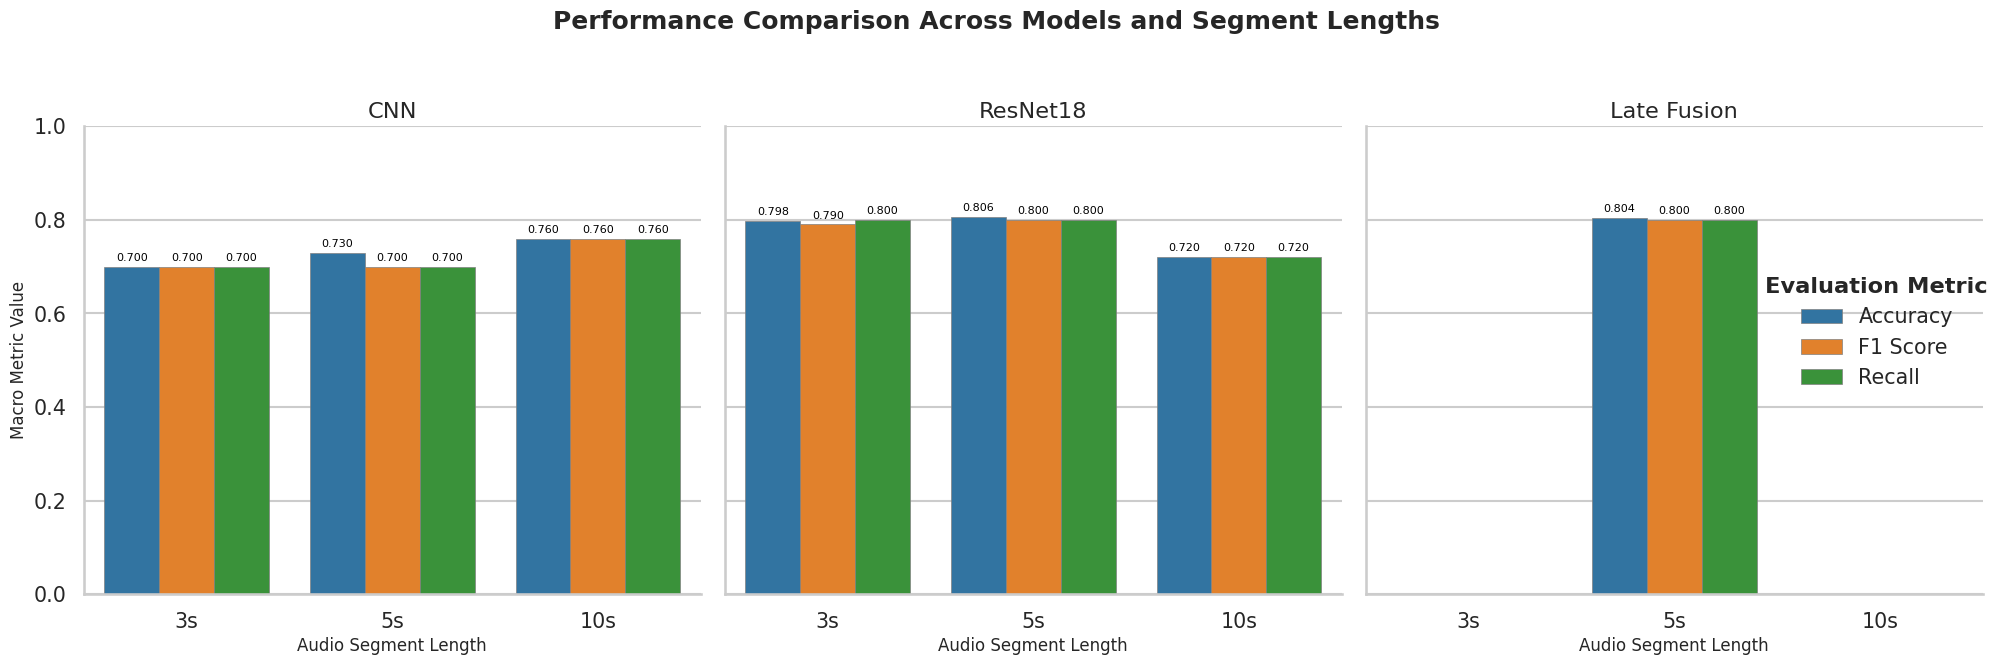

In [4]:
sns.set_theme(style="whitegrid", context="talk", font_scale=0.9)

colors = sns.color_palette("tab10", 3)

g = sns.catplot(
    data=df_risultati,
    kind="bar",
    x="Dataset_Length",
    y="Value",
    hue="Metric",
    col="Model",
    palette=colors,
    height=6.5,
    aspect=0.95,
    legend_out=True,
    edgecolor="gray",
    linewidth=0.5
)

g.set_axis_labels("Audio Segment Length", "Macro Metric Value")
g.set_titles("{col_name}")
g.fig.suptitle("Performance Comparison Across Models and Segment Lengths",
               fontsize=18,
               fontweight='bold',
               y=1.03)

for ax in g.axes.flat:
    ax.set_ylim(0.0, 1.0)

    ax.set_xlabel(ax.get_xlabel(), fontsize=12)
    ax.set_ylabel(ax.get_ylabel(), fontsize=12)

    for container in ax.containers:
        if len(container.get_children()) > 0:
            labels = [f'{v.get_height():.3f}' for v in container]
            ax.bar_label(container, labels=labels, padding=3, size=8, color='black')

g.legend.set_title("Evaluation Metric")
g.legend.get_title().set_fontweight('bold')

plt.tight_layout()
g.fig.savefig('full_project_performance_comparison.png', dpi=600)